# Part 01

# Decision Tree Classifier 

# 0. Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split

import category_encoders
import category_encoders as ce

from sklearn.tree import DecisionTreeClassifier

from sklearn.tree import plot_tree

from sklearn.metrics import accuracy_score

from sklearn import tree

from sklearn.metrics import confusion_matrix

from sklearn.metrics import classification_report

from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import plot_confusion_matrix

In [2]:
import warnings

warnings.filterwarnings('ignore')

# 1. Read data

In [3]:
path = '/kaggle/input/car-evaluation-data-set/car_evaluation.csv'

df = pd.read_csv(path, header=None)

# 2. Exploratory data analysis

In [4]:
df.shape

(1728, 7)

In [5]:
df.head()

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [6]:
# Rename column names

col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']


df.columns = col_names

col_names

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

In [7]:
# let's again preview the dataset

df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [9]:
df['class'].unique()

array(['unacc', 'acc', 'vgood', 'good'], dtype=object)

In [10]:
df['class'].value_counts()

unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64

### Missing values in variables

In [11]:
# check missing values in variables

df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

# 3. X, y

In [12]:
X = df.drop(['class'], axis=1)

y = df['class']

# 4. train test split

In [13]:
# split X and y into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [14]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((1157, 6), (571, 6))

# 5. Preprocessing

In [15]:
# check data types in X_train

X_train.dtypes

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
dtype: object

### Encode categorical variables

In [16]:
# encode variables with ordinal encoding

# import category_encoders as ce

encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])


X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

# 6. Decision Tree Classifier with criterion gini index

In [17]:
# instantiate the DecisionTreeClassifier model with criterion gini index

clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)


# fit the model
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

### Predict the Test set results with criterion gini index

In [18]:
y_pred_gini = clf_gini.predict(X_test)

### Check accuracy score with criterion gini index

In [19]:
accuracy_score(y_test, y_pred_gini)

0.8021015761821366

### Compare the train-set and test-set accuracy

In [20]:
y_pred_train_gini = clf_gini.predict(X_train)

y_pred_train_gini

array(['unacc', 'unacc', 'unacc', ..., 'unacc', 'unacc', 'acc'],
      dtype=object)

### Check for overfitting and underfitting

In [21]:
# print the scores on training and test set

clf_gini.score(X_train, y_train)

0.7865168539325843

In [22]:
clf_gini.score(X_test, y_test)

0.8021015761821366

### feature importances

In [23]:
pd.DataFrame(index=X.columns,data=clf_gini.feature_importances_,columns=['Feature Importance'])

,Feature Importance
buying,0.135144
maint,0.000000
doors,0.000000
persons,0.505174
lug_boot,0.000000
safety,0.359682


### Visualize decision-trees

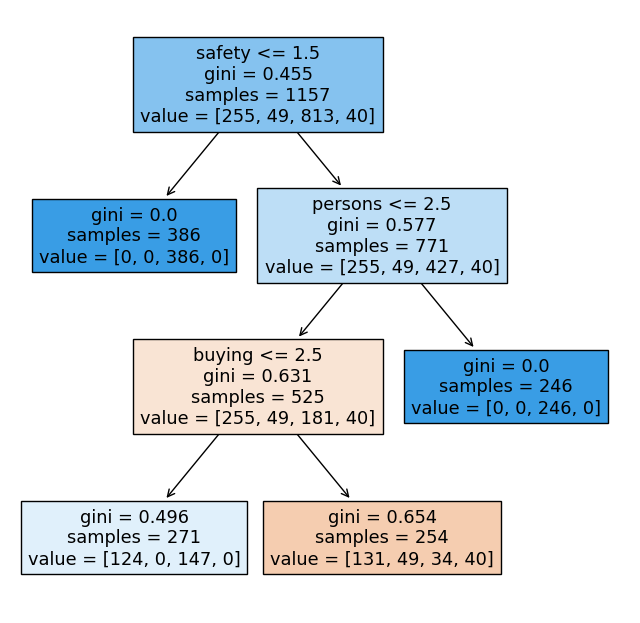

In [24]:
plt.figure(figsize=(8,8),dpi=100)
plot_tree(clf_gini,filled=True,feature_names=X.columns);

In [25]:
(X_train['safety']<=1.5).sum()

386

In [26]:
(X_train['safety']>1.5).sum()

771

# 7. Decision Tree Classifier with criterion entropy

In [27]:
# instantiate the DecisionTreeClassifier model with criterion entropy

clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)


# fit the model
clf_en.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

### Predict the Test set results with criterion entropy

In [28]:
y_pred_en = clf_en.predict(X_test)

### Check accuracy score with criterion entropy

In [29]:
accuracy_score(y_test, y_pred_en)

0.8021015761821366

### Compare the train-set and test-set accuracy

In [30]:
y_pred_train_en = clf_en.predict(X_train)

y_pred_train_en

array(['unacc', 'unacc', 'unacc', ..., 'unacc', 'unacc', 'acc'],
      dtype=object)

In [31]:
accuracy_score(y_train, y_pred_train_en)

0.7865168539325843

### Check for overfitting and underfitting

In [32]:
# print the scores on training and test set

clf_en.score(X_train, y_train)

0.7865168539325843

In [33]:
clf_en.score(X_test, y_test)

0.8021015761821366

### Visualize decision-trees

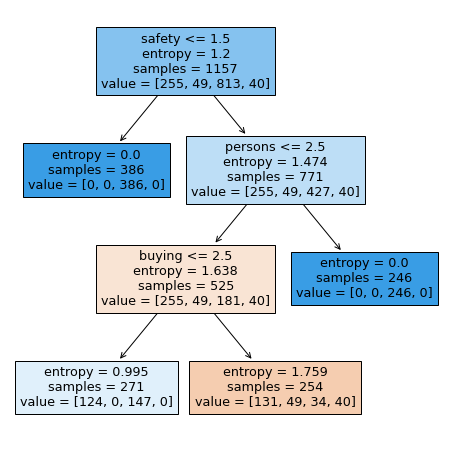

In [34]:
plt.figure(figsize=(8,8))

plot_tree(clf_en,filled=True,feature_names=X.columns);

# 8. Confusion matrix


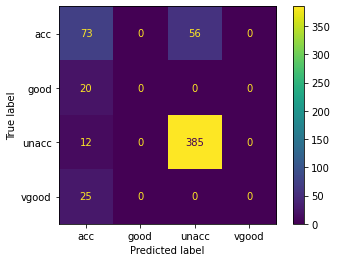

In [35]:
# Print the Confusion Matrix and slice it into four pieces

plot_confusion_matrix(clf_en, X_test, y_test)

# 9. Classification Report

In [36]:
print(classification_report(y_test, y_pred_en))

              precision    recall  f1-score   support

         acc       0.56      0.57      0.56       129
        good       0.00      0.00      0.00        20
       unacc       0.87      0.97      0.92       397
       vgood       0.00      0.00      0.00        25

    accuracy                           0.80       571
   macro avg       0.36      0.38      0.37       571
weighted avg       0.73      0.80      0.77       571



# 10. Understanding Hyperparameters

### Max Depth

In [37]:
pruned_tree = DecisionTreeClassifier(max_depth=2)
pruned_tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2)

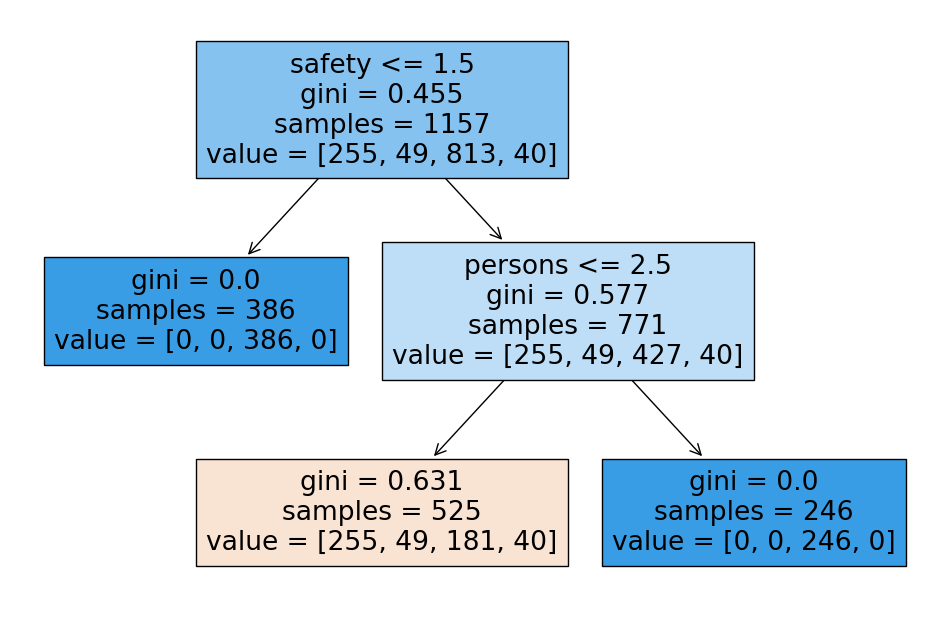

In [38]:
plt.figure(figsize=(12,8),dpi=100)
plot_tree(pruned_tree,filled=True,feature_names=X.columns);

### Max Leaf Nodes

In [39]:
pruned_tree = DecisionTreeClassifier(max_leaf_nodes=5)
pruned_tree.fit(X_train,y_train)

DecisionTreeClassifier(max_leaf_nodes=5)

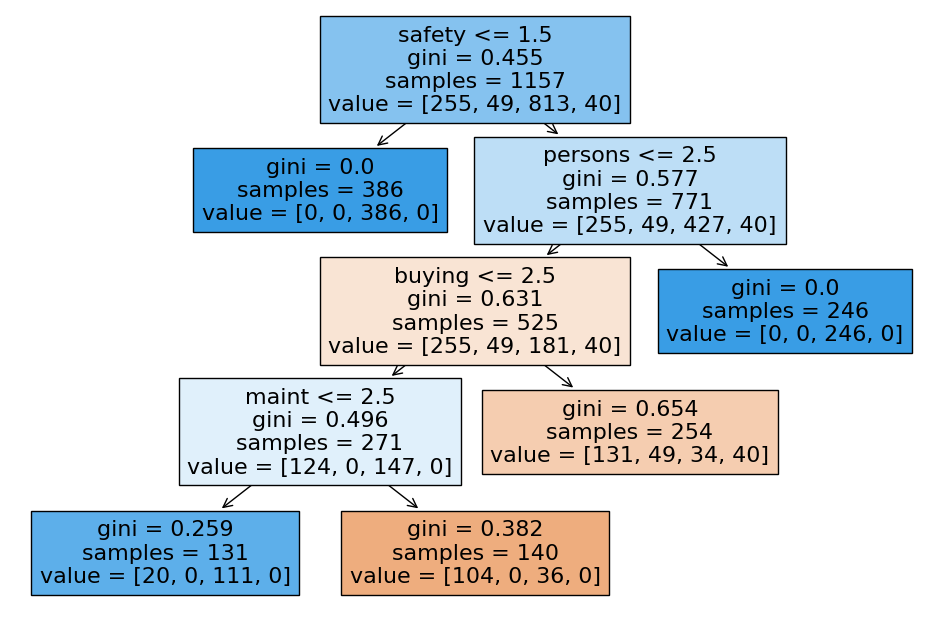

In [40]:
plt.figure(figsize=(12,8),dpi=100)
plot_tree(pruned_tree,filled=True,feature_names=X.columns);

# Part 02

# Random Forest

In [41]:
n_estimators=[64, 100, 128, 200]
max_features=[2, 3, 4]
bootstrap=[True, False]

In [42]:
param_grid= {'n_estimators':n_estimators,
            'max_features':max_features,
            'bootstrap':bootstrap}

In [43]:
RF_model= RandomForestClassifier()
grid=GridSearchCV(RF_model, param_grid, cv=5 )

In [44]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False], 'max_features': [2, 3, 4],
                         'n_estimators': [64, 100, 128, 200]})

In [45]:
grid.best_params_

{'bootstrap': False, 'max_features': 4, 'n_estimators': 200}

In [46]:
y_pred= grid.predict(X_test)

In [47]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         acc       0.92      0.85      0.89       129
        good       0.59      0.95      0.73        20
       unacc       0.99      0.98      0.99       397
       vgood       0.92      0.88      0.90        25

    accuracy                           0.95       571
   macro avg       0.86      0.92      0.88       571
weighted avg       0.96      0.95      0.95       571



In [48]:
RF_model_OOB= RandomForestClassifier(max_features=2, n_estimators=64, oob_score=True)

In [49]:
RF_model_OOB.fit(X_train, y_train)

RandomForestClassifier(max_features=2, n_estimators=64, oob_score=True)

In [50]:
RF_model_OOB.oob_score_

0.9498703543647364

In [51]:
# OOB Error

1 - RF_model_OOB.oob_score_

0.050129645635263564

# [[Source](https://www.kaggle.com/code/prashant111/decision-tree-classifier-tutorial/notebook)]

# Finished!